<a href="https://colab.research.google.com/github/ahkswarun/CodeClauseInternship_Gold_Price_Prediction/blob/main/Gold%20Price%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/drive/MyDrive/python/gld_price_data.csv')

In [3]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033
2290,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# number of rows and columns
gold_data.shape

(2291, 6)

In [6]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2291 entries, 0 to 2290
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [8]:
corr = gold_data.corr()

<ipython-input-8-b39988c1c6f8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = gold_data.corr()


<Axes: >

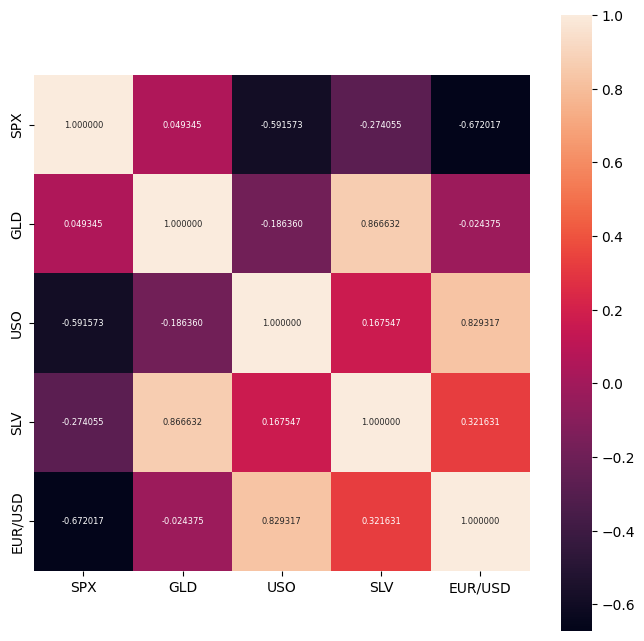

In [9]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(corr,square=True, fmt='.6f',annot=True, annot_kws={'size':6})

In [10]:
# correlation values of GLD
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-11-e7795cde1e69>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'])


<Axes: xlabel='GLD', ylabel='Density'>

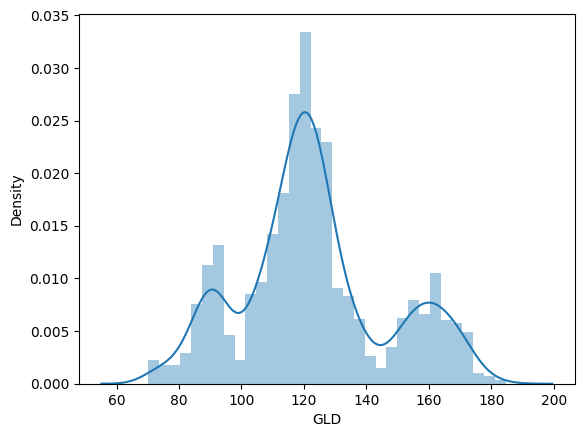

In [11]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'])

Splitting the Features and Target

In [12]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [13]:
X=X.dropna()
Y=Y.dropna()

Splitting into Training data and Test Data

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training:
Random Forest Regressor

In [15]:
regressor = RandomForestRegressor(n_estimators=100)

In [16]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [17]:
# prediction on Test Data
data_prediction = regressor.predict(X_test)

In [18]:
data_prediction

array([168.68039931,  81.55160011, 116.06050023, 127.62090033,
       120.82750153, 154.43059813, 150.40839809, 125.9961002 ,
       117.46289898, 126.1431008 , 116.52570092, 171.64830124,
       141.63799842, 167.90589885, 115.10429999, 117.70560042,
       138.52640321, 169.99570076, 159.70560266, 159.13389898,
       155.1878001 , 125.19750066, 176.02870084, 157.57710299,
       125.10550052,  94.02049972,  76.6603005 , 120.45909997,
       119.0109988 , 167.46269939,  88.23770059, 125.33259999,
        91.20140063, 117.61570049, 121.09959891, 136.30390034,
       115.5208011 , 115.31670079, 147.40900056, 107.26310152,
       104.5228024 ,  87.07739808, 126.48730013, 118.02169972,
       152.21239915, 119.7508999 , 108.31629998, 108.22739823,
        93.15090025, 127.04259797,  75.18220032, 113.6283994 ,
       120.95940002, 111.23029944, 118.92459899, 120.31429925,
       159.61640052, 167.20830142, 146.93489681,  85.80399858,
        94.57580023,  86.86949893,  90.44829995, 119.02

In [19]:
# R squared error
error_score = metrics.r2_score(Y_test,data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9895018404559314


Compare the Actual Values and Predicted Values in a Plot

In [20]:
Y_test = list(Y_test)

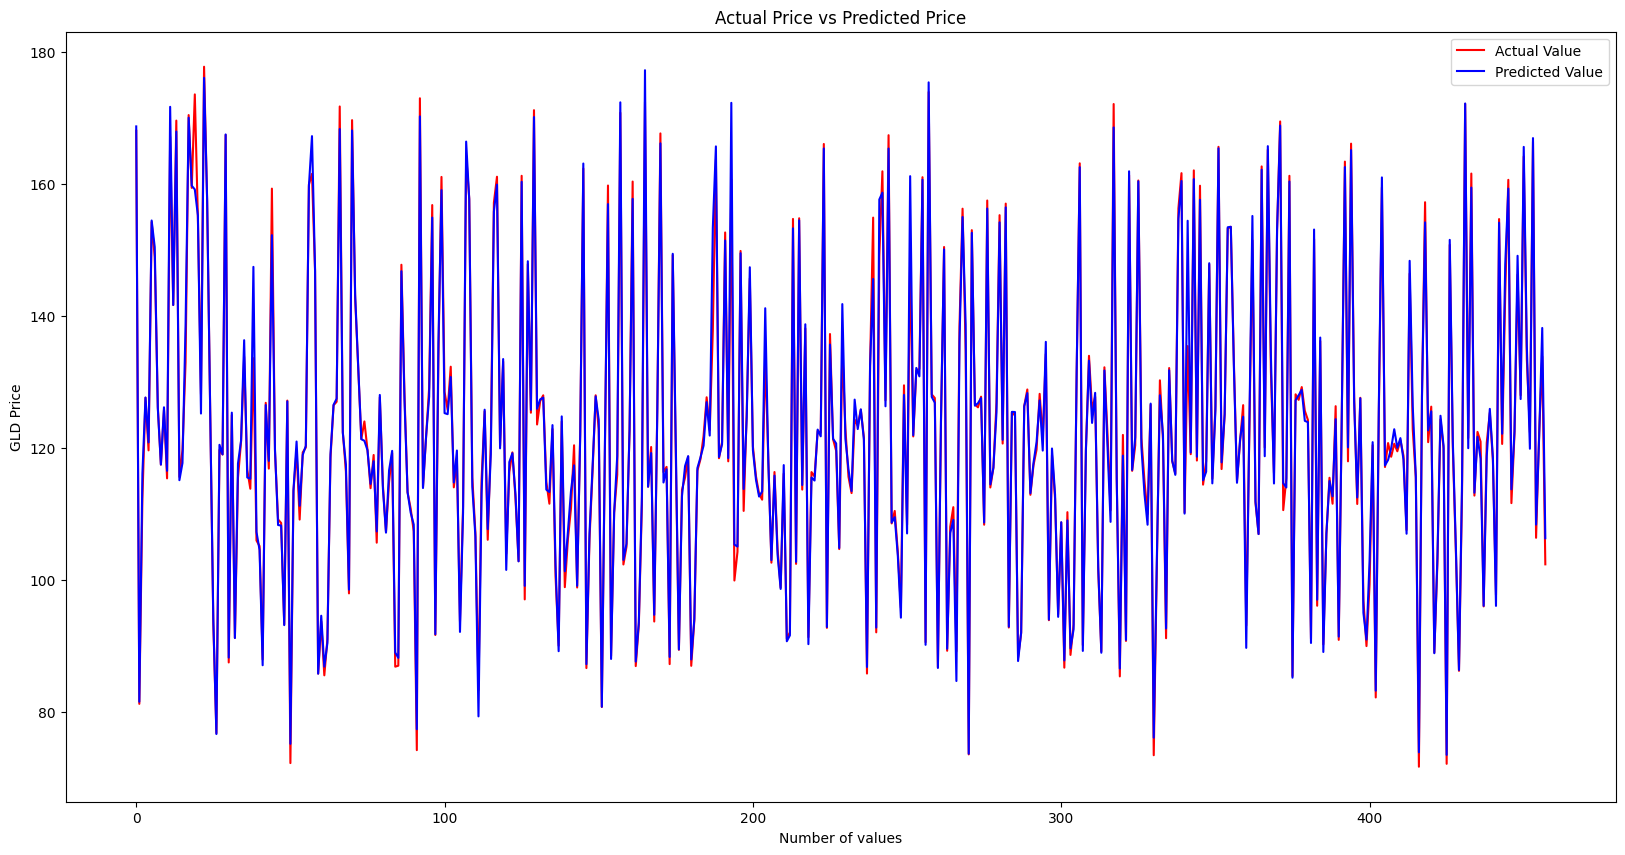

In [21]:
plt.figure(figsize=(20,10))
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(data_prediction, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()